#### Logistic Regression and classification
## $$J(\theta) = Cost(X, y, \theta) + \lambda R(\theta)$$

- The second term in the above function is called **regularization term**.
- The $\lambda$ is **regularization strength**, a mean to balance or trade-off between our two different objectives.

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score

import warnings

In [2]:
# initial setup
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['figure.dpi'] = 150

plt.style.use('ggplot')
np.random.seed(1)
np.set_printoptions(precision=2, linewidth=100)
warnings.filterwarnings(action='ignore')

## Regression with Regularization

#### Generate data

In [3]:
def f(x,y):
    return ((x*10) **2 )+ (y*10)

def generate_data(n_samples=30):
    x = np.sort(np.random.rand(n_samples))
    y = np.sort(np.random.rand(n_samples))
    z = f(x,y) + 1.0 * np.random.randn(n_samples) 
    return x, y, z

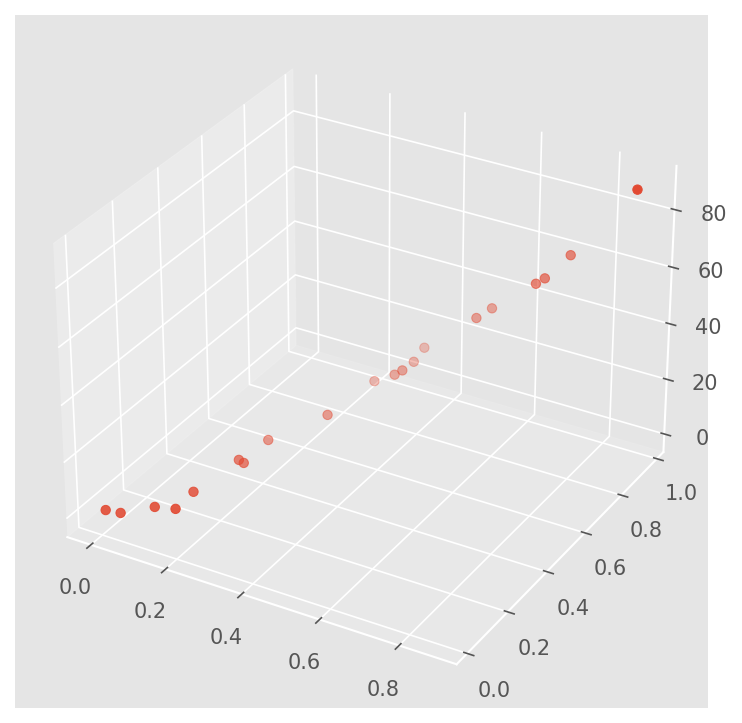

In [4]:
x, y, z = generate_data(20)

xy = np.zeros((len(x),2))
xy[:,0]=x.ravel()
xy[:,1]=y.ravel()
#Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, 'r', marker='o')
plt.show()

### Polynomial Regression

In [5]:
def fit_poly(xy, z, degree=1):
    
    # add polynomial features
    polynomial_features = PolynomialFeatures(degree=degree, include_bias=False)
    
    # create and fit the model
    linear_regression = LinearRegression()
    model = Pipeline([("polynomial_features", polynomial_features), ("linear_regression", linear_regression)])
    model.fit(xy, z)
    return model

In [6]:
degrees = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23]

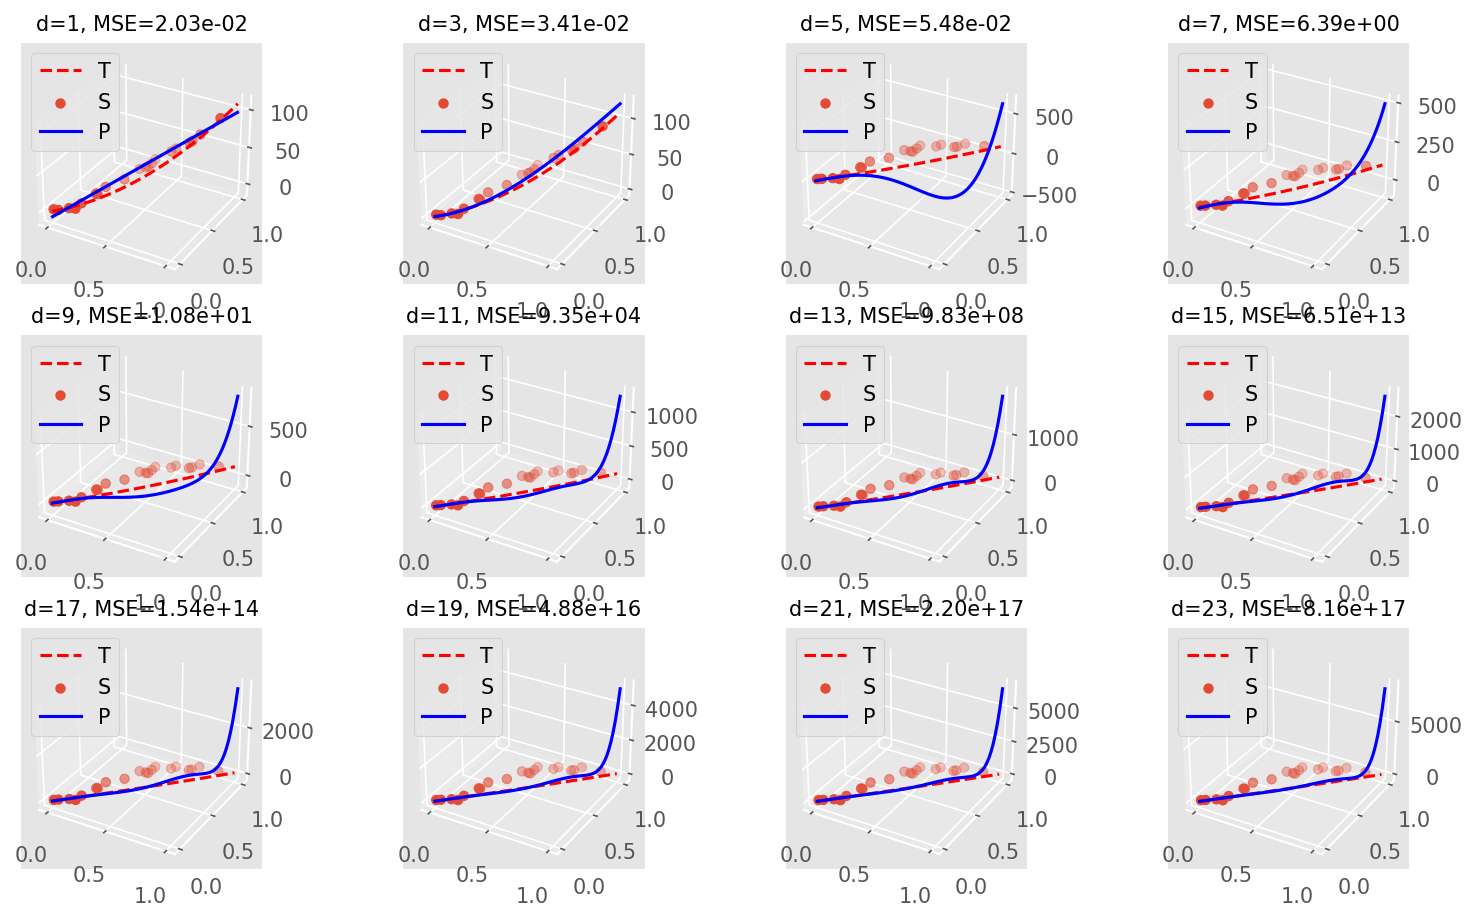

In [7]:
fig = plt.figure()
for d in degrees:
    model = fit_poly(xy, z, degree=d)
    scores = cross_val_score(model, x[:, None], y, scoring="neg_mean_squared_error", cv=10)
    
    # plot data and model
    ax = fig.add_subplot(3, 4, degrees.index(d) + 1, projection='3d')
    plt.tight_layout()
   
    x_test = np.linspace(0, 1, 100)
    y_test = np.linspace(0, 1, 100)
    xy_test = np.zeros((len(x_test), 2))
    xy_test[:,0] = x_test.ravel()
    xy_test[:,1] = y_test.ravel()

    ax.plot(x_test, y_test, f(x_test,y_test), 'r--', label="Target")
    ax.scatter(x, y, z, 'g', label="Samples")
    ax.plot(x_test, y_test, model.predict(xy_test), 'b', label="Predicted")
    plt.legend('TSP')
    plt.title("d={}, MSE={:.2e}".format(d, -scores.mean()), fontsize=10)

plt.show()

In [8]:
def plot_coef(theta):
    plt.figure()
    plt.bar(np.arange(1, len(theta) + 1), height=np.abs(theta))
    plt.show()

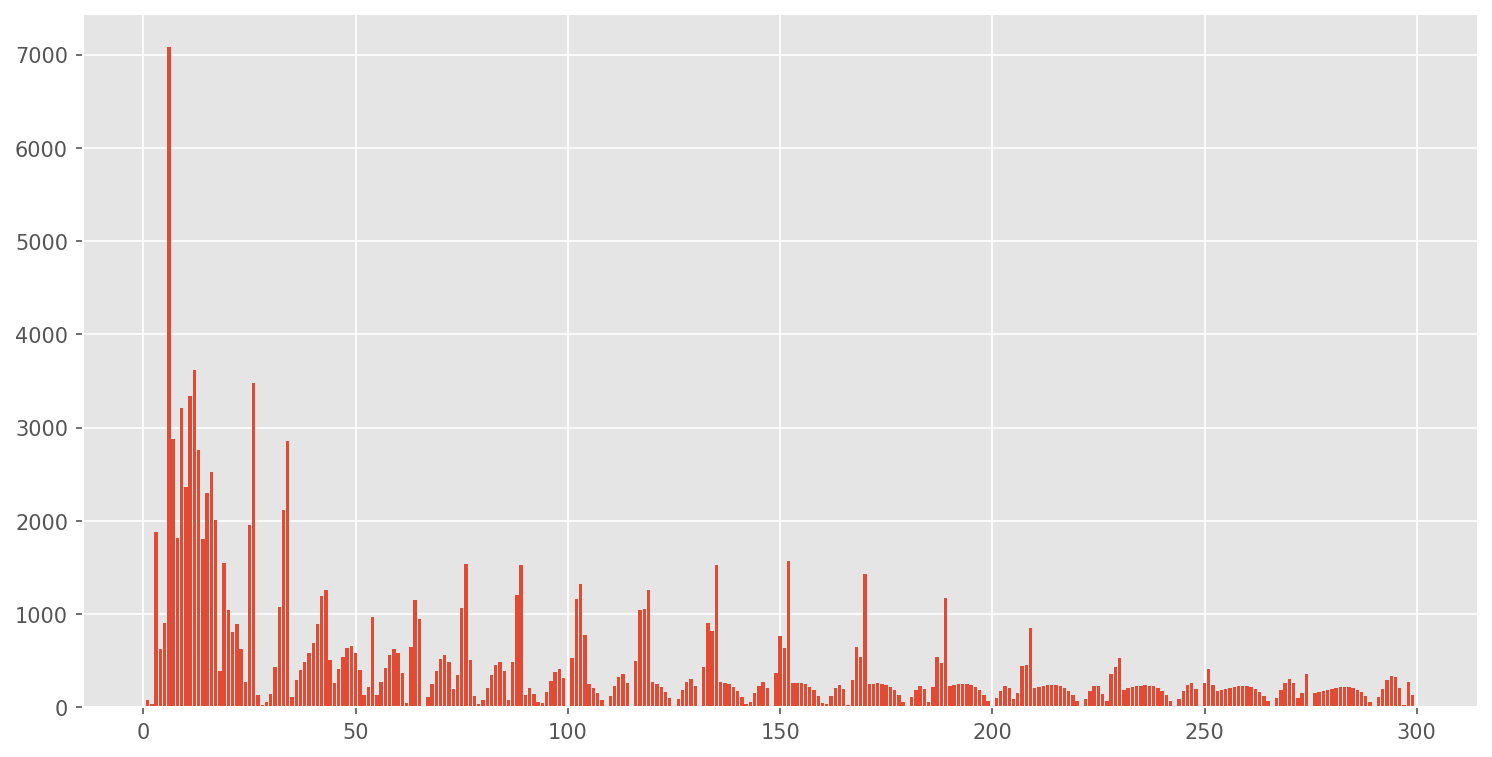

In [9]:
plot_coef(model.steps[1][1].coef_)

### L2-Regularizarion (Ridge)

$$J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)})^2 + \frac{\lambda}{2m} \sum_{j=1}^{n} \theta_j^2$$

In [10]:
def fit_poly_L2_reg(degree=1, lmbda=1.0):
    # add polynomial features
    polynomial_features = PolynomialFeatures(degree=degree, include_bias=False)
    
    # create and fit the model
    linear_regression = Ridge(alpha=lmbda)
    model = Pipeline([("polynomial_features", polynomial_features), ("linear_regression", linear_regression)])
    model.fit(xy, z)
    return model

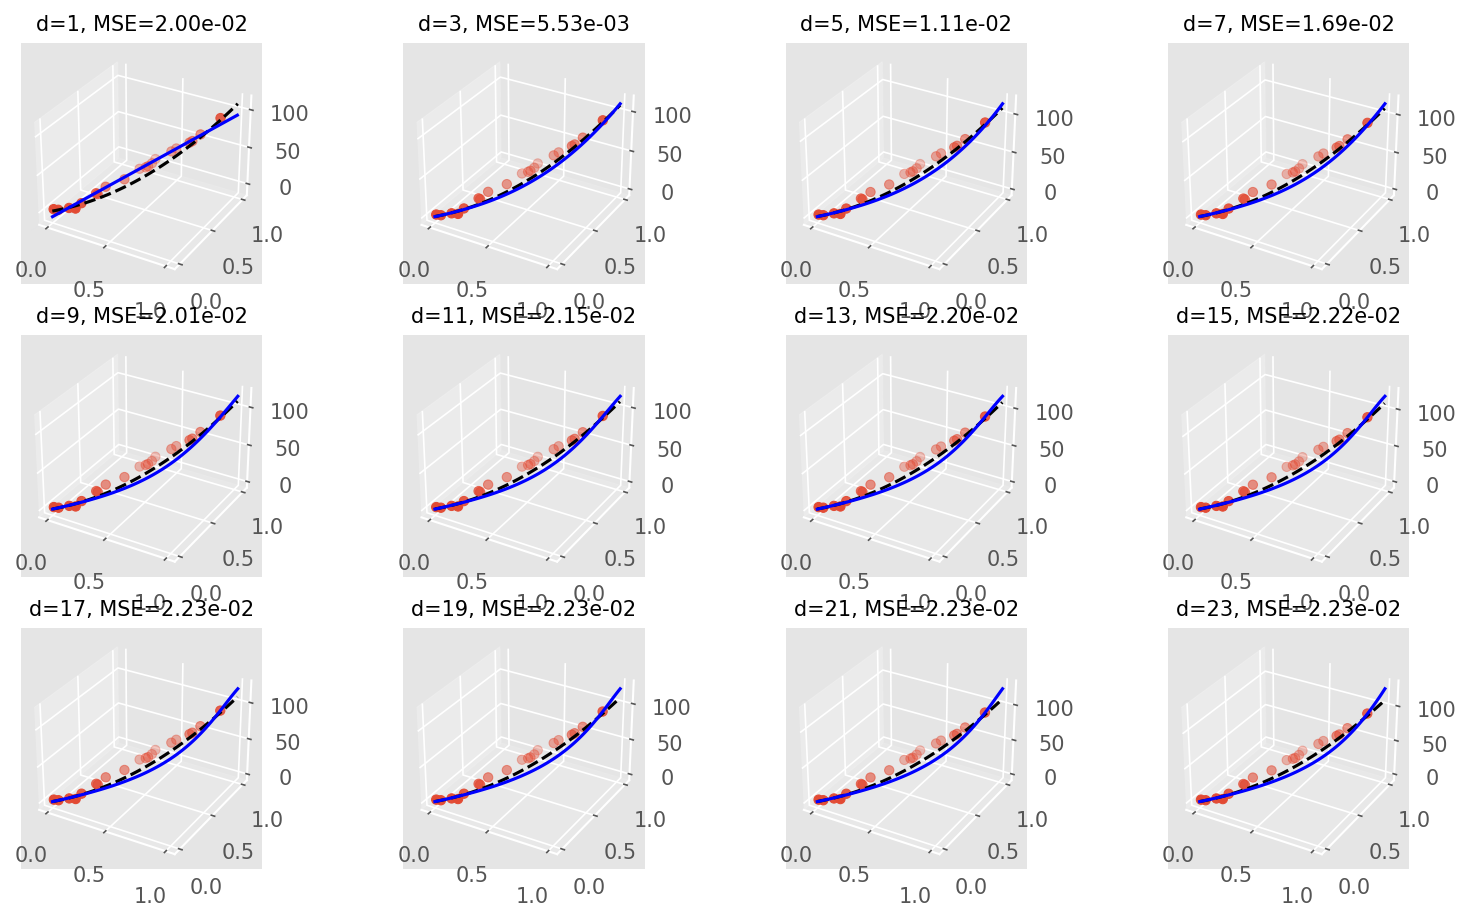

In [11]:
lmbda = 1e-2
degrees = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23]
fig = plt.figure()
for d in degrees:
    model = fit_poly_L2_reg(d, lmbda)
    scores = cross_val_score(model, x[:, None], y, scoring="neg_mean_squared_error", cv=10)
    
    # plot data and model
    ax = fig.add_subplot(3, 4, degrees.index(d) + 1, projection='3d')
    plt.tight_layout()
   
    x_test = np.linspace(0, 1, 100)
    y_test = np.linspace(0, 1, 100)
    xy_test = np.zeros((len(x_test), 2))
    xy_test[:,0] = x_test.ravel()
    xy_test[:,1] = y_test.ravel()

    ax.plot(x_test, y_test, f(x_test,y_test), 'k--', label="Target")
    ax.scatter(x, y, z, 'g', label="Samples")
    ax.plot(x_test, y_test, model.predict(xy_test), 'b', label="Predicted")
    plt.title("d={}, MSE={:.2e}".format(d, -scores.mean()), fontsize=10)

plt.show()

Visualizing effect of $\lambda$

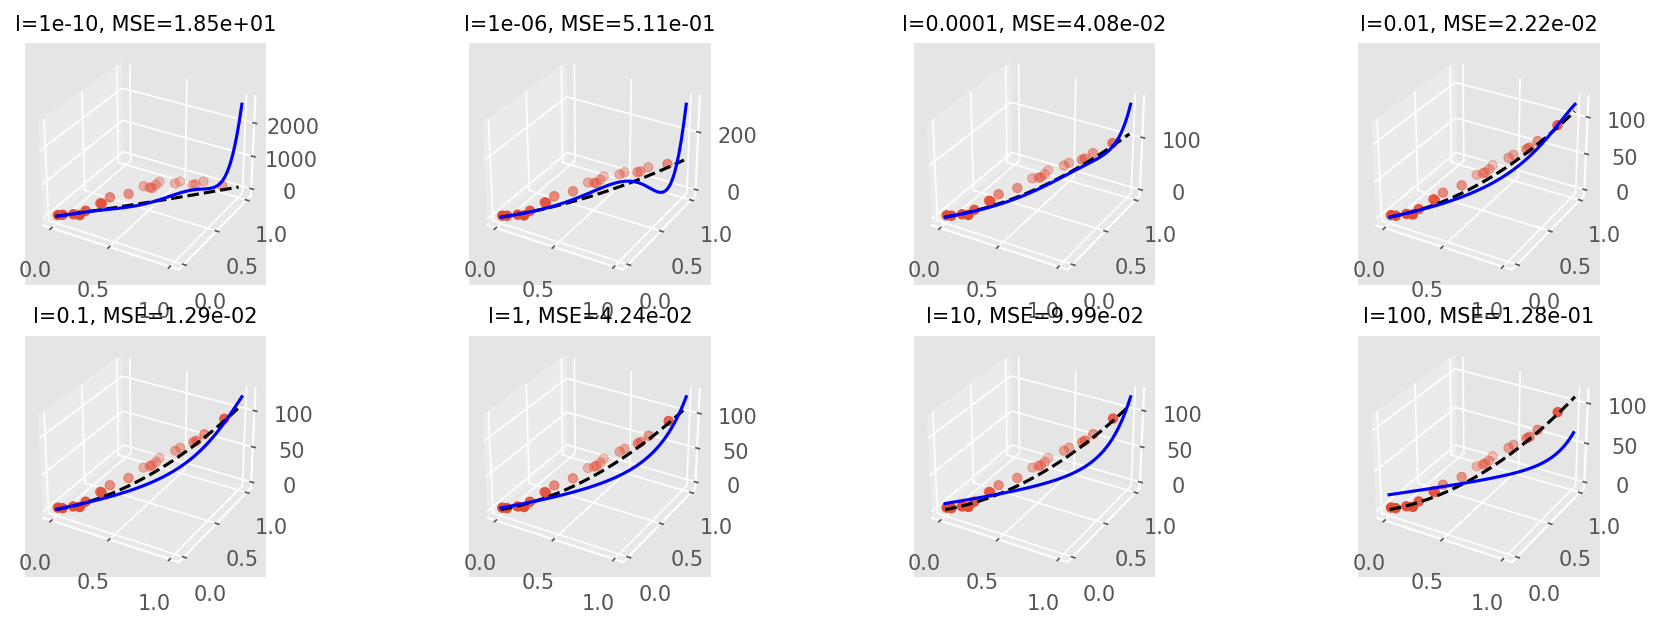

In [12]:
lmbdas = [1e-10, 1e-6, 1e-4, 1e-2, 1e-1, 1, 10, 100]

fig = plt.figure()
for l in lmbdas:
    model = fit_poly_L2_reg(15, l)
    scores = cross_val_score(model, x[:, None], y, scoring="neg_mean_squared_error", cv=10)
    
    # plot data and model
    ax = fig.add_subplot(3, 4, lmbdas.index(l) + 1, projection='3d')
    plt.tight_layout()
   
    x_test = np.linspace(0, 1, 100)
    y_test = np.linspace(0, 1, 100)
    xy_test = np.zeros((len(x_test), 2))
    xy_test[:,0] = x_test.ravel()
    xy_test[:,1] = y_test.ravel()

    ax.plot(x_test, y_test, f(x_test,y_test), 'k--', label="Target")
    ax.scatter(x, y, z, 'g', label="Samples")
    ax.plot(x_test, y_test, model.predict(xy_test), 'b', label="Predicted")
    plt.title("l={}, MSE={:.2e}".format(l, -scores.mean()), fontsize=10)

plt.show()

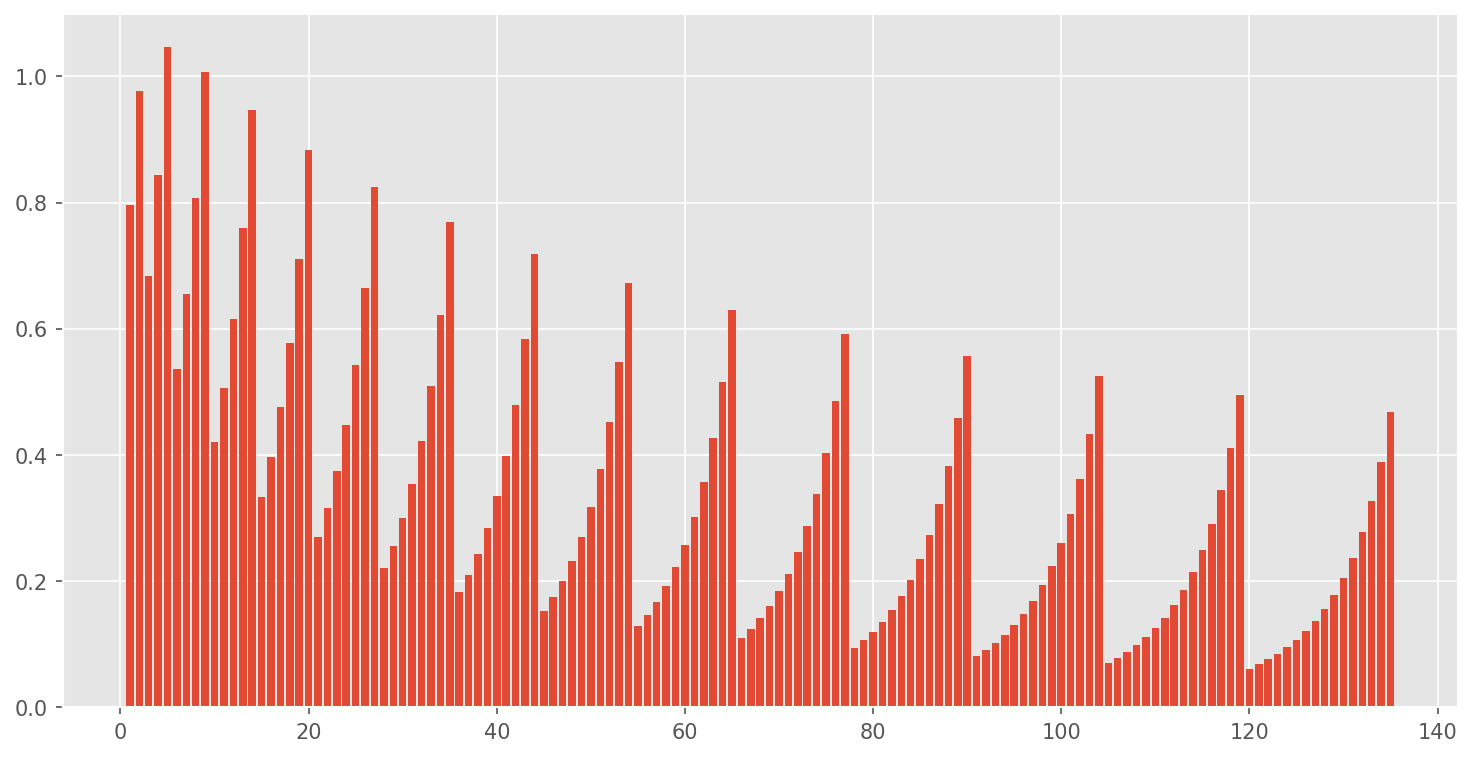

In [13]:
plot_coef(model.steps[1][1].coef_)

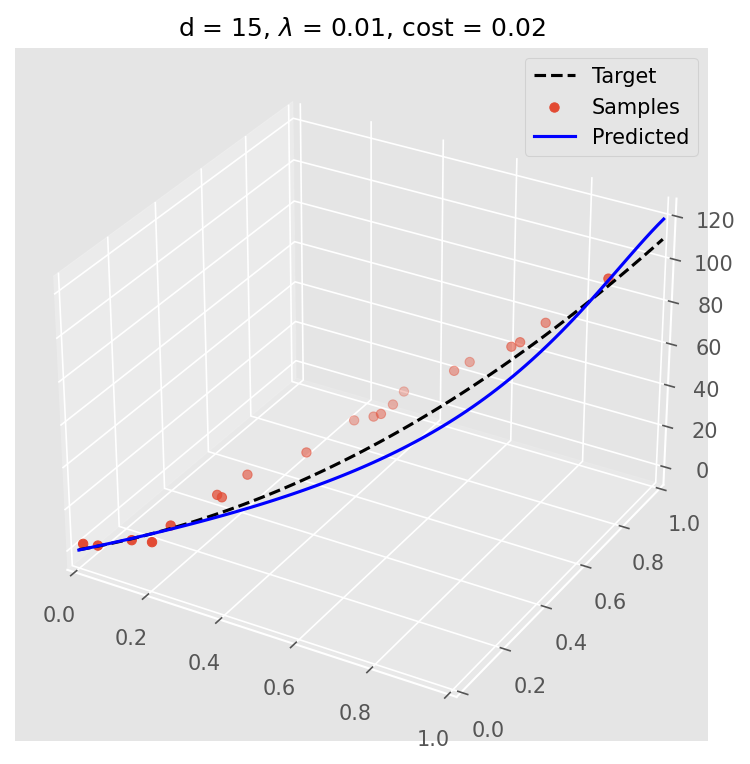

In [14]:
degree = 15
lmbda = 1e-2

# fit
model = fit_poly_L2_reg(degree, lmbda)
scores = cross_val_score(model, x[:,None], y, scoring="neg_mean_squared_error", cv=10)

# plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x_test = np.linspace(0, 1, 100)
y_test = np.linspace(0, 1, 100)
xy_test = np.zeros((len(x_test), 2))
xy_test[:,0] = x_test.ravel()
xy_test[:,1] = y_test.ravel()

ax.plot(x_test, y_test, f(x_test,y_test), 'k--', label="Target")
ax.scatter(x, y, z, 'g', label="Samples")
ax.plot(x_test, y_test, model.predict(xy_test), 'b', label="Predicted")

ax.set_xlim((0, 1))
ax.set_ylim((0, 1))

ax.set_title("d = %d, $\lambda$ = %s, cost = %.2f" % (degree, lmbda, -scores.mean()), fontsize=12)
ax.legend()

plt.show()

### L1-Regularizarion (Lasso)

$$J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)})^2 + \frac{\lambda}{m} \sum_{j=1}^{n} |\theta_j|$$

In [15]:
def fit_poly_L1_reg(degree=1, lmbda=1.0):
    
    # add polynomial features up to degree
    polynomial_features = PolynomialFeatures(degree=degree, include_bias=False)
    l1_regression = Lasso(alpha=lmbda)
    model = Pipeline([("poly", polynomial_features), ("l1_reg", l1_regression)])
    
    # create and fit the model
    model.fit(xy, z)
    return model

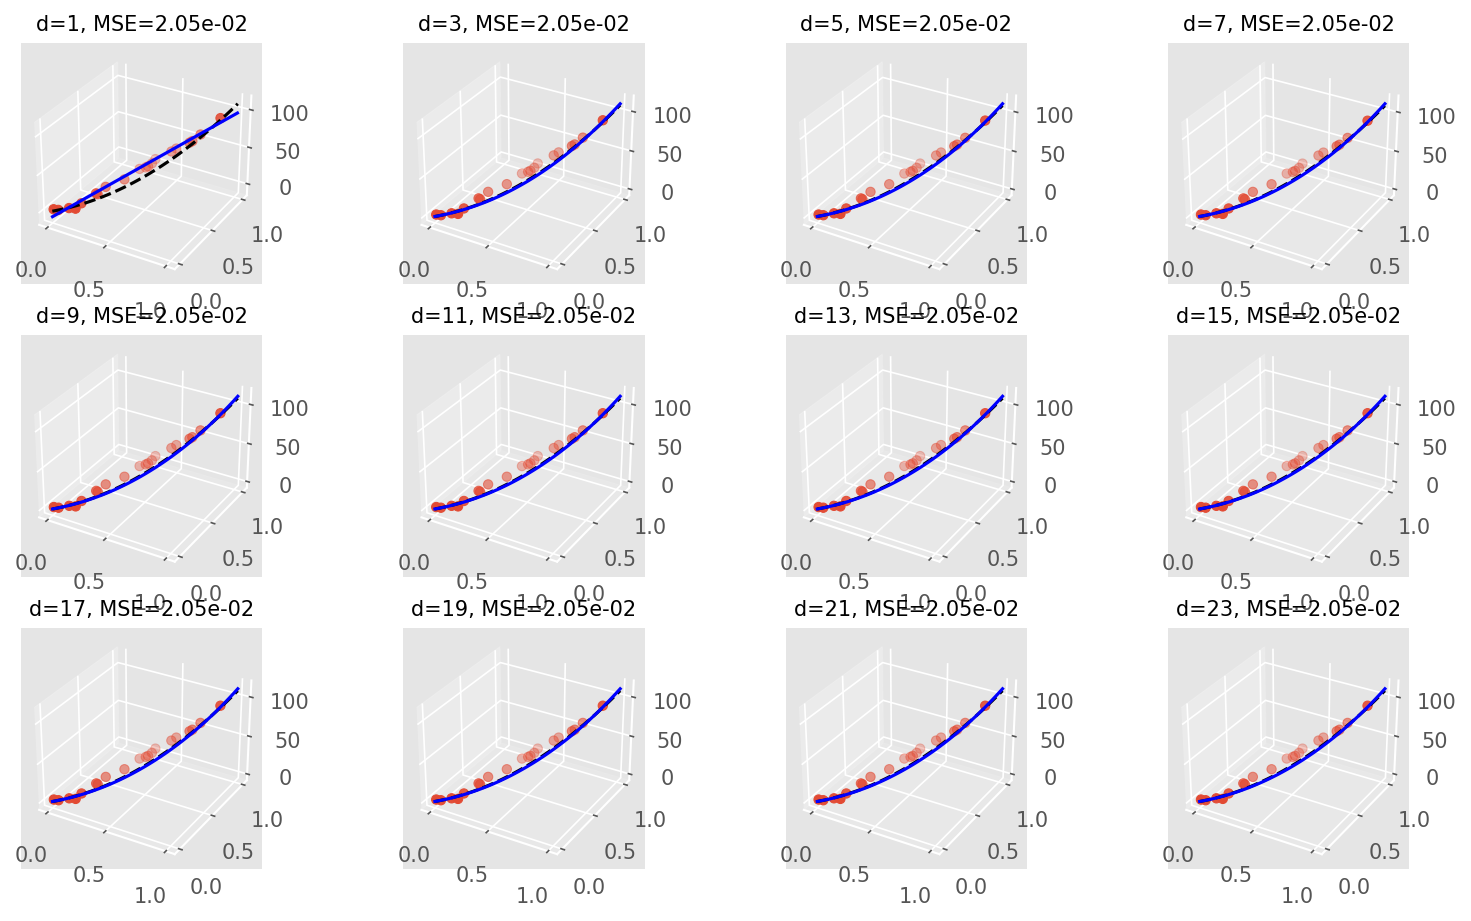

In [16]:
lmbda = 1e-2
degrees = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23]
fig = plt.figure()
for d in degrees:
    model = fit_poly_L1_reg(d, lmbda)
    scores = cross_val_score(model, x[:, None], y, scoring="neg_mean_squared_error", cv=10)
    
    # plot data and model
    ax = fig.add_subplot(3, 4, degrees.index(d) + 1, projection='3d')
    plt.tight_layout()
    ax.scatter(x, y, z, 'g', label="Samples")
   
    x_test = np.linspace(0, 1, 100)
    y_test = np.linspace(0, 1, 100)
    xy_test = np.zeros((len(x_test), 2))
    xy_test[:,0] = x_test.ravel()
    xy_test[:,1] = y_test.ravel()

    ax.plot(x_test, y_test, f(x_test,y_test), 'k--', label="Target")
    ax.plot(x_test, y_test, model.predict(xy_test), 'b', label="Predicted") #Predicting
    plt.title("d={}, MSE={:.2e}".format(d, -scores.mean()), fontsize=10)

plt.show()

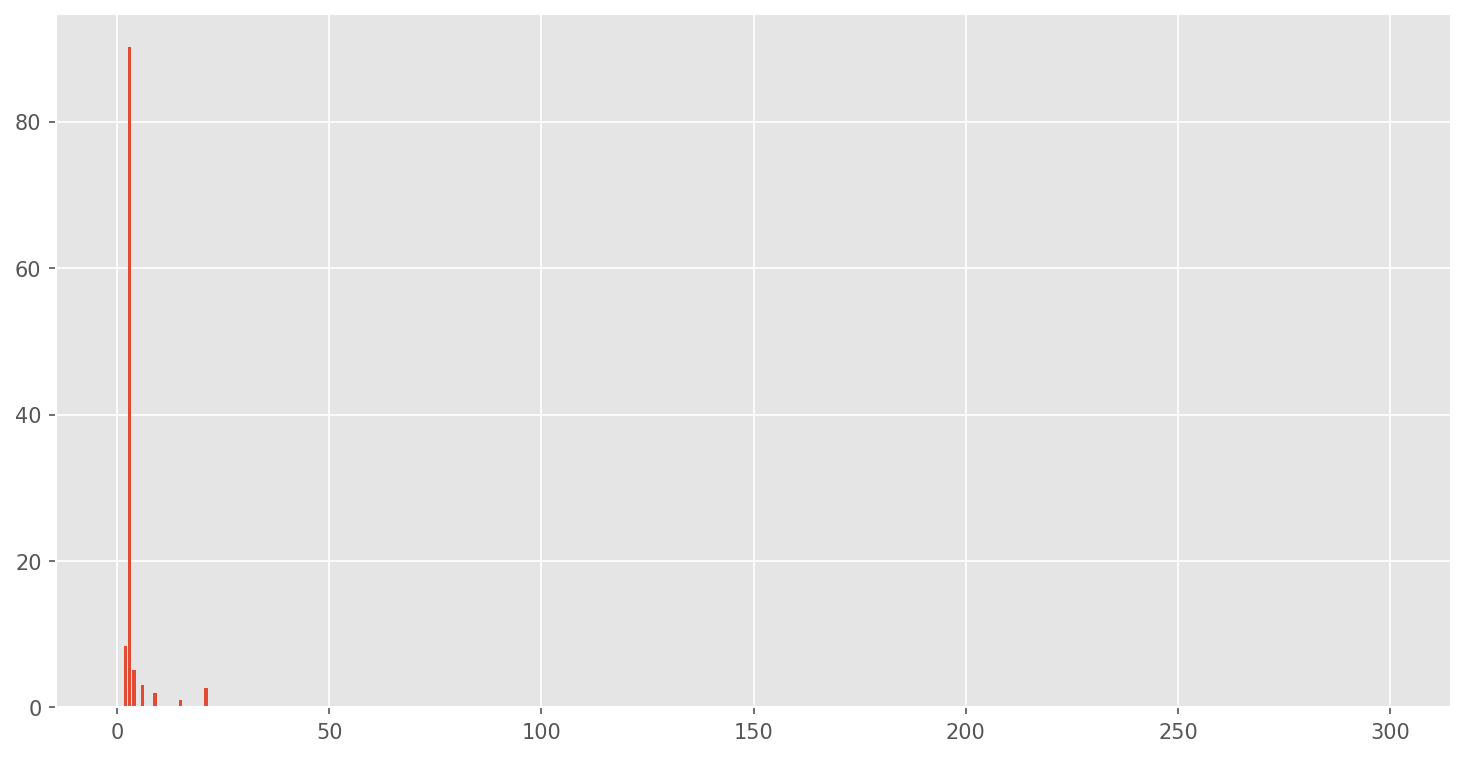

In [17]:
plot_coef(model.steps[1][1].coef_)

Visualizing effect of $\lambda$

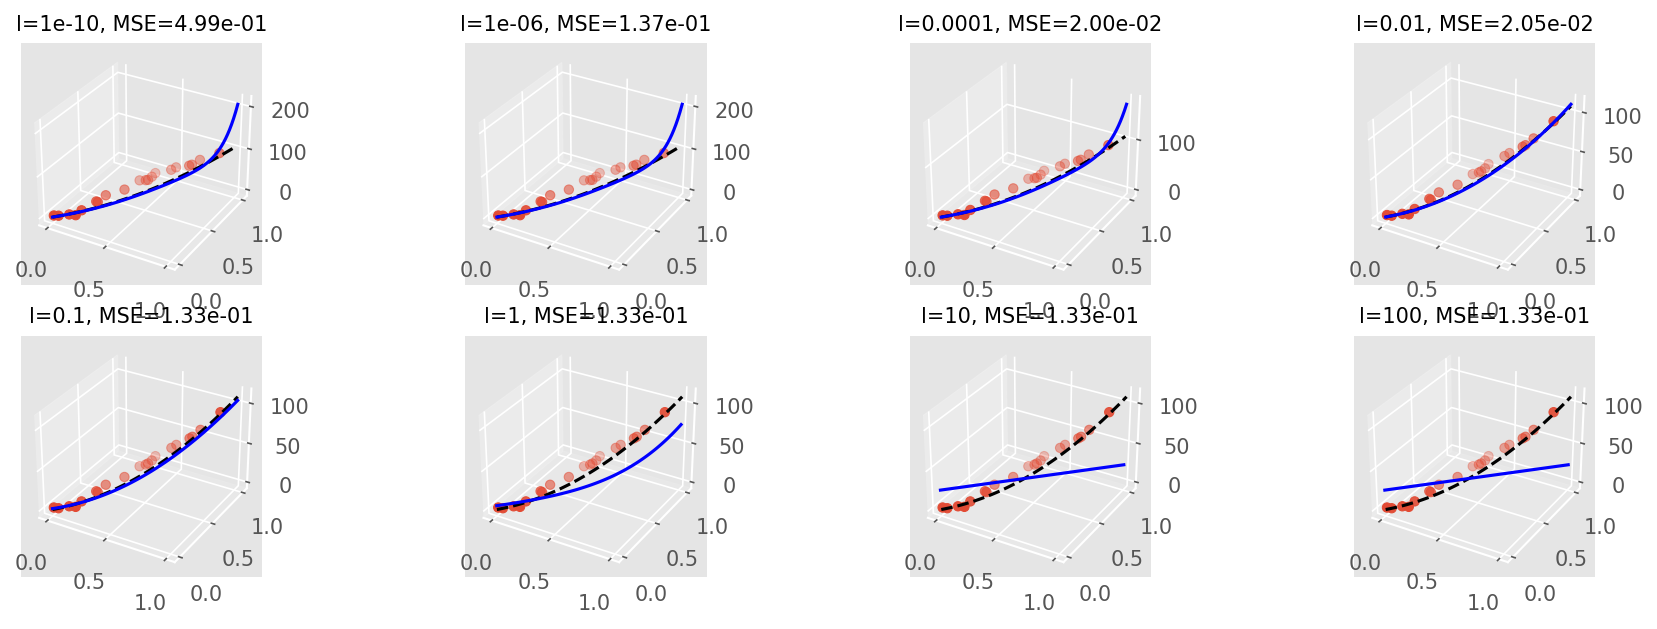

In [18]:
lmbdas = [1e-10, 1e-6, 1e-4, 1e-2, 1e-1, 1, 10, 100]

fig = plt.figure()
for l in lmbdas:
    model = fit_poly_L1_reg(15, l)
    scores = cross_val_score(model, x[:, None], y, scoring="neg_mean_squared_error", cv=10)
    
    # plot data and model
    ax = fig.add_subplot(3, 4, lmbdas.index(l) + 1, projection='3d')
    plt.tight_layout()
   
    x_test = np.linspace(0, 1, 100)
    y_test = np.linspace(0, 1, 100)
    xy_test = np.zeros((len(x_test), 2))
    xy_test[:,0] = x_test.ravel()
    xy_test[:,1] = y_test.ravel()

    ax.plot(x_test, y_test, f(x_test,y_test), 'k--', label="Target")
    ax.scatter(x, y, z, 'g', label="Samples")
    ax.plot(x_test, y_test, model.predict(xy_test), 'b', label="Predicted")
    plt.title("l={}, MSE={:.2e}".format(l, -scores.mean()), fontsize=10)

plt.show()

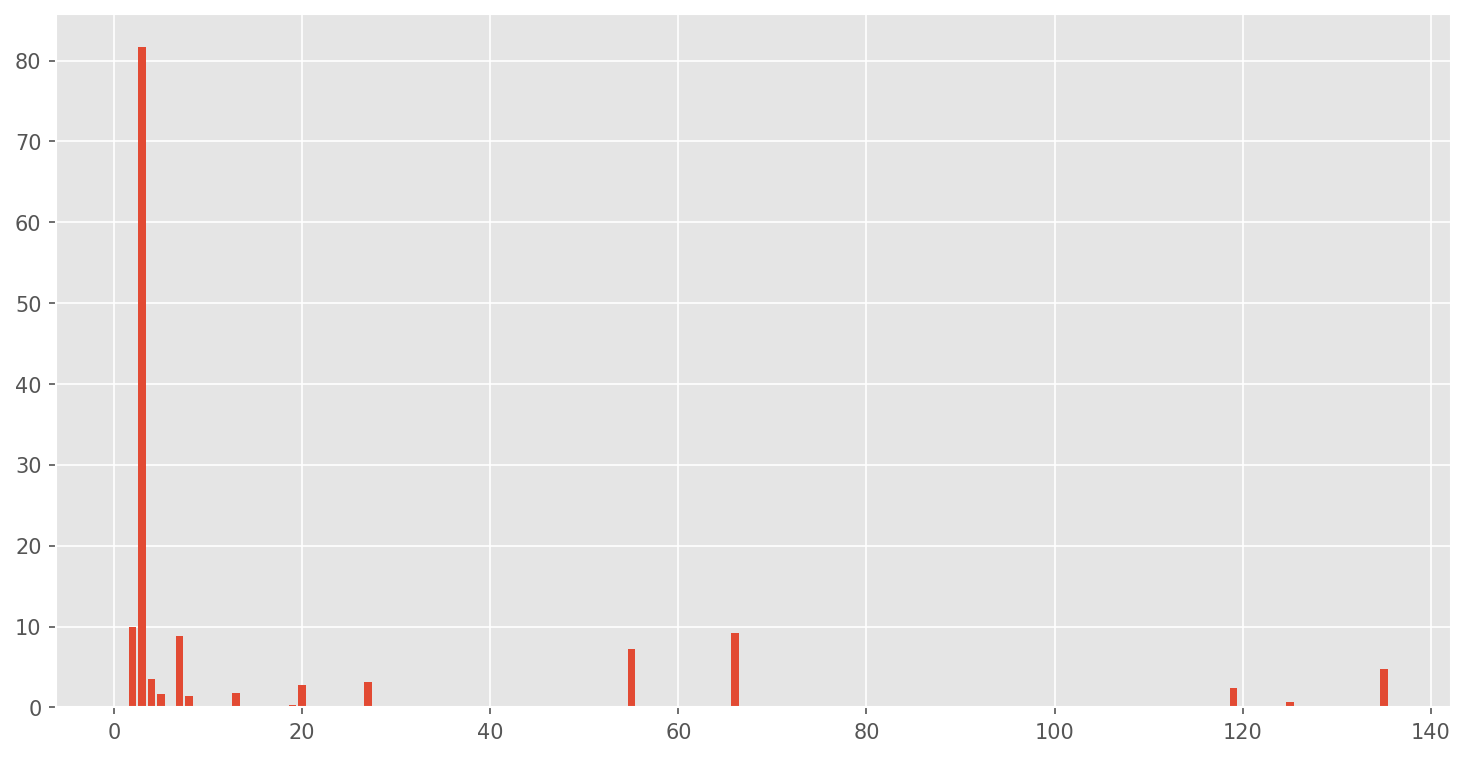

In [19]:
model = fit_poly_L1_reg(degree=15, lmbda=0.001)
plot_coef(model.steps[1][1].coef_)

### L1 cost function

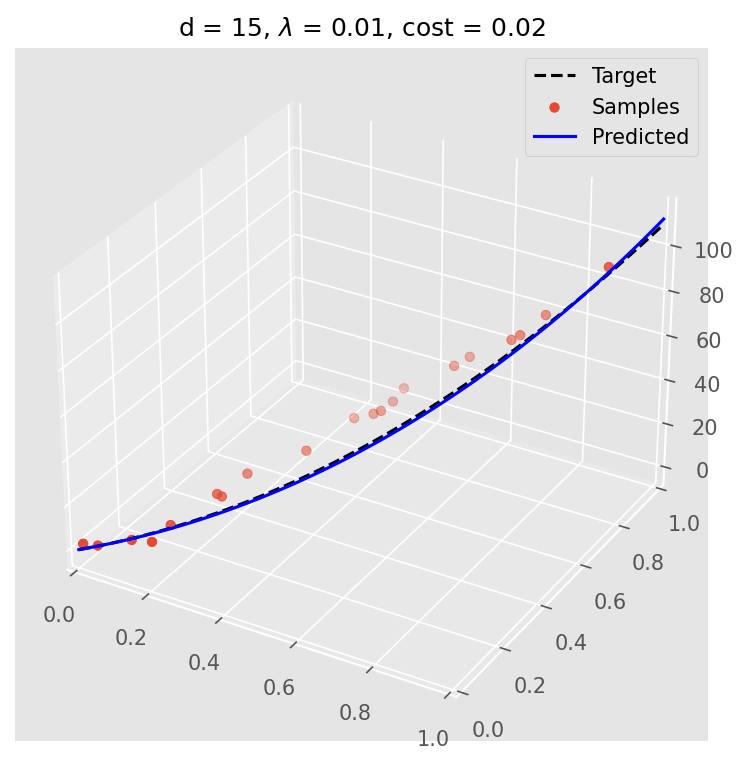

In [20]:
degree = 15
lmbda = 1e-2

# fit
model = fit_poly_L1_reg(degree, lmbda)
scores = cross_val_score(model, x[:,None], y, scoring="neg_mean_squared_error", cv=10)

# plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x_test = np.linspace(0, 1, 100)
y_test = np.linspace(0, 1, 100)
xy_test = np.zeros((len(x_test), 2))
xy_test[:,0] = x_test.ravel()
xy_test[:,1] = y_test.ravel()

ax.plot(x_test, y_test, f(x_test,y_test), 'k--', label="Target")
ax.scatter(x, y, z, 'g', label="Samples")
ax.plot(x_test, y_test, model.predict(xy_test), 'b', label="Predicted")

ax.set_xlim((0, 1))
ax.set_ylim((0, 1))

ax.set_title("d = %d, $\lambda$ = %s, cost = %.2f" % (degree, lmbda, -scores.mean()), fontsize=12)
ax.legend()

plt.show()